# Setup

In [ ]:
%pip install numpy==1.23.5
%pip install torch==2.0.0

  Using cached torch-2.0.0-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_cupti_cu11-11.7.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu11-10.9.0.58-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu11-10.2.10.91-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusolver_cu11-11.4.0.1-2-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu11-11.7.4.91-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu11-2.14.3-py3-none-manylinux1_x86_64

In [ ]:
# give colab permission to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Update these as required
repo_path = '/content/drive/MyDrive/github/subteams/LLMProbing'
odeformer_path = '/content/drive/MyDrive/aisc' # This is because I cloned the odeformer repo into my aisc folder

samples_path = '/content/drive/MyDrive/github/subteams/LLMProbing/probing_data/samples/r2_expt'
activations_path = '/content/drive/MyDrive/github/subteams/LLMProbing/probing_data/activations/r2_expt'
probes_path = '/content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt'

In [ ]:
import sys
import importlib
sys.path.append(repo_path)
sys.path.append(odeformer_path)

In [ ]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [ ]:
from odeformer.model import SymbolicTransformerRegressor
dstr = SymbolicTransformerRegressor(from_pretrained=True)
model_args = {'beam_size': 10, 'beam_temperature': 0.8}
dstr.set_model_args(model_args)

Downloading...
From (original): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W
From (redirected): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W&confirm=t&uuid=a9ca372e-e095-4719-9cf6-6aec5eda8e2e
To: /content/odeformer.pt
100%|██████████| 465M/465M [00:06<00:00, 67.7MB/s]


Loaded pretrained model


In [ ]:
%load_ext autoreload
%autoreload 2

# Run experiment

In [ ]:
from experiments.run_experiment import scalar_prediction_experiment

In [ ]:
threshold_r2_probes_path = f'{probes_path}/threshold_r2_probes_more_layers'
lr = 0.01
num_epochs = 15
num_repeats = 3
layers = [i for i in range(4,16)]

In [ ]:
more_layers_r2_expt_results = scalar_prediction_experiment('r2_score', activations_path, threshold_r2_probes_path, \
                                                       lr=lr, num_epochs=num_epochs, \
                                                       layers=layers, \
                                                       r2_threshold=0.5, \
                                                       num_repeats=num_repeats)
# save experiment results
with open(f'{threshold_r2_probes_path}/experiment_data.pt', 'wb') as f:
    pickle.dump(more_layers_r2_expt_results, f)

Repeat 0 of layer 4



Training LR Probe:  13%|█▎        | 2/15 [00:16<01:49,  8.45s/it]


KeyboardInterrupt: 

# Load results

In [ ]:
with open(f'{threshold_r2_probes_path}/experiment_data.pt', 'rb') as f:
    more_layers_r2_expt_results = pickle.load(f)

In [ ]:
more_layers_r2_expt_results

,layer,run,test_loss,final_train_loss,final_val_loss
0,4,0,2.951838,1.140160,3.864149
1,4,1,0.628929,0.058580,0.862263
2,4,2,10.175287,2.102627,10.818907
3,5,0,200.328248,5.989154,198.529016
4,5,1,30.778915,4.143000,33.538521
5,5,2,56.886329,5.257023,73.493372
6,6,0,1.520684,0.278501,1.589969
7,6,1,0.442224,0.014884,0.365493
8,6,2,0.770079,0.044129,0.641847
9,7,0,0.005421,0.000314,0.005982


In [ ]:
from experiments.utils import summarise_experiment, plot_from_summary

In [ ]:
more_layers_r2_expt_summary = summarise_experiment(more_layers_r2_expt_results)

In [ ]:
more_layers_r2_expt_summary

,layer,loss_mean,loss_std
0,4,4.585352,4.978405
1,5,95.997831,91.290888
2,6,0.910996,0.552867
3,7,0.010205,0.006095
4,8,0.132795,0.192628
5,9,0.333603,0.397877
6,10,0.742702,0.481104
7,11,0.660755,0.760397
8,12,0.327993,0.338267
9,13,0.965223,0.667796


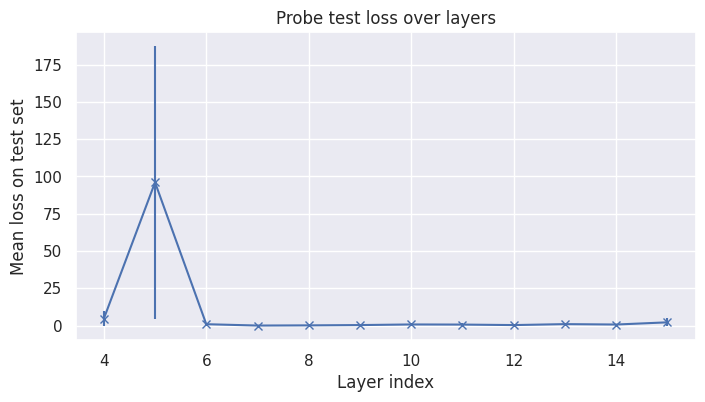

In [ ]:
plot_from_summary(more_layers_r2_expt_summary)

# Extended training on layer 7

In [ ]:
L7_r2_probes_path = f'{probes_path}/L7_probes'
lr = 0.01
num_epochs = 15
num_repeats = 10
layers = [7]

In [ ]:
L7_r2_expt_results = scalar_prediction_experiment('r2_score', activations_path, L7_r2_probes_path, \
                                                       lr=lr, num_epochs=num_epochs, \
                                                       layers=layers, \
                                                       r2_threshold=0.5, \
                                                       num_repeats=num_repeats)
# save experiment results
with open(f'{L7_r2_probes_path}/experiment_data.pt', 'wb') as f:
    pickle.dump(L7_r2_expt_results, f)

Repeat 0 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:25<00:00,  5.69s/it]



Training Set (Epoch 15 - Final): Loss 0.0007877877410096148
Regression probe trained on layer 7: Test Set Loss 0.01998047162587308
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_0.pt
Repeat 1 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:24<00:00,  5.65s/it]



Training Set (Epoch 15 - Final): Loss 0.002712621476864631
Regression probe trained on layer 7: Test Set Loss 0.011118677921979113
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_1.pt
Repeat 2 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:23<00:00,  5.54s/it]



Training Set (Epoch 15 - Final): Loss 0.0008668005072182938
Regression probe trained on layer 7: Test Set Loss 0.0022003963784686365
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_2.pt
Repeat 3 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:24<00:00,  5.65s/it]



Training Set (Epoch 15 - Final): Loss 0.001874634573264425
Regression probe trained on layer 7: Test Set Loss 0.001952323308875823
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_3.pt
Repeat 4 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:24<00:00,  5.64s/it]



Training Set (Epoch 15 - Final): Loss 0.0009978946026102356
Regression probe trained on layer 7: Test Set Loss 0.008858493026571225
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_4.pt
Repeat 5 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:24<00:00,  5.63s/it]



Training Set (Epoch 15 - Final): Loss 0.0002089974130875497
Regression probe trained on layer 7: Test Set Loss 0.0017694242842356302
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_5.pt
Repeat 6 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:23<00:00,  5.59s/it]



Training Set (Epoch 15 - Final): Loss 0.004417957305614019
Regression probe trained on layer 7: Test Set Loss 0.009006590876658128
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_6.pt
Repeat 7 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:24<00:00,  5.63s/it]



Training Set (Epoch 15 - Final): Loss 0.0012743233255113828
Regression probe trained on layer 7: Test Set Loss 0.0026939770000665216
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_7.pt
Repeat 8 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:22<00:00,  5.48s/it]



Training Set (Epoch 15 - Final): Loss 0.0013528633674198048
Regression probe trained on layer 7: Test Set Loss 0.005883086886946679
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_8.pt
Repeat 9 of layer 7



Training LR Probe: 100%|██████████| 15/15 [01:23<00:00,  5.55s/it]



Training Set (Epoch 15 - Final): Loss 0.001040985393096029
Regression probe trained on layer 7: Test Set Loss 0.02245494804691128
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/probing_data/probes/r2_expt/L7_probes/probe_r2_score_7_9.pt


In [ ]:
with open(f'{L7_r2_probes_path}/experiment_data.pt', 'rb') as f:
    L7_r2_expt_results = pickle.load(f)

L7_r2_expt_results

,layer,run,test_loss,final_train_loss,final_val_loss
0,7,0,0.019980,0.000788,0.021761
1,7,1,0.011119,0.002713,0.011917
2,7,2,0.002200,0.000867,0.003447
3,7,3,0.001952,0.001875,0.002827
4,7,4,0.008858,0.000998,0.009403
5,7,5,0.001769,0.000209,0.002787
6,7,6,0.009007,0.004418,0.010352
7,7,7,0.002694,0.001274,0.003573
8,7,8,0.005883,0.001353,0.006519
9,7,9,0.022455,0.001041,0.023228


In [ ]:
from experiments.utils import summarise_experiment

In [ ]:
summarise_experiment(L7_r2_expt_results)

,layer,loss_mean,loss_std
0,7,0.008592,0.007469


# Loading trained probes

In [ ]:
from experiments.run_experiment import load_and_run_scalar_prediction_experiment

In [ ]:
L7_extra_results = load_and_run_scalar_prediction_experiment(
    'r2_score',
    activations_path,
    L7_r2_probes_path,
    layers=[7],
    r2_threshold=0.5,
    num_repeats=10
)

L7_extra_results

Repeat 0 of layer 7
Repeat 1 of layer 7
Repeat 2 of layer 7
Repeat 3 of layer 7
Repeat 4 of layer 7
Repeat 5 of layer 7
Repeat 6 of layer 7
Repeat 7 of layer 7
Repeat 8 of layer 7
Repeat 9 of layer 7


,layer,run,val_loss,val_r2,val_spearman,val_pearson,test_loss,test_r2,test_spearman,test_pearson
0,7,0,0.021761,-6.948503,0.364857,0.117807,0.019980,-9.962182,0.287918,0.215837
1,7,1,0.011917,-3.352892,0.047908,0.132669,0.011119,-5.100205,0.329508,0.221612
2,7,2,0.003447,-0.259106,-0.042962,0.114100,0.002200,-0.207236,0.251358,0.269677
3,7,3,0.002827,-0.032718,0.186405,0.195087,0.001952,-0.071132,0.456436,0.259312
4,7,4,0.009403,-2.434478,0.347471,0.144587,0.008858,-3.860166,0.219301,0.198236
5,7,5,0.002787,-0.017939,0.527405,0.248597,0.001769,0.029215,0.544428,0.380875
6,7,6,0.010352,-2.781342,0.077083,0.057592,0.009007,-3.941419,0.018141,0.142406
7,7,7,0.003573,-0.305176,-0.017431,0.119910,0.002694,-0.478036,0.200944,0.192646
8,7,8,0.006519,-1.381236,0.405613,0.130898,0.005883,-2.227725,0.272091,0.160617
9,7,9,0.023228,-7.484345,0.235690,0.176968,0.022455,-11.319791,0.186536,0.283717


In [ ]:
from src.probes.utils import load_probe_from_path, eval_regression_probe
from src.datasets.utils import split_dataset
from src.datasets import ActivationsDataset
from torch.utils.data import DataLoader

In [ ]:
probe_path = f'{L7_r2_probes_path}/probe_r2_score_7_5.pt'

In [ ]:
L7_probe = load_probe_from_path(probe_path)

In [ ]:
full_dataset = ActivationsDataset(activations_path=activations_path, feature_label='r2_score', layer_idx=7, r2_threshold=0.5)
train_dataset, val_dataset, test_dataset = split_dataset(full_dataset, lengths=[0.8, 0.1, 0.1])
val_dataloader = DataLoader(val_dataset)
test_dataloader = DataLoader(test_dataset)

In [ ]:
eval_regression_probe(L7_probe, test_dataloader)

(0.0017694242842356302,
 0.029214554315004526,
 0.5444279896334692,
 0.3808749127001647)

# Loading old probes to see R^2 score, Spearman and Pearson coeffs

In [ ]:
from experiments.run_experiment import load_and_run_scalar_prediction_experiment

In [ ]:
more_r2_results = load_and_run_scalar_prediction_experiment(
    'r2_score',
    activations_path,
    threshold_r2_probes_path,
    layers=[i for i in range(4,16)],
    r2_threshold=0.5,
    num_repeats=3
)

more_r2_results

Repeat 0 of layer 4
Repeat 1 of layer 4
Repeat 2 of layer 4
Repeat 0 of layer 5
Repeat 1 of layer 5
Repeat 2 of layer 5
Repeat 0 of layer 6
Repeat 1 of layer 6
Repeat 2 of layer 6
Repeat 0 of layer 7
Repeat 1 of layer 7
Repeat 2 of layer 7
Repeat 0 of layer 8
Repeat 1 of layer 8
Repeat 2 of layer 8
Repeat 0 of layer 9
Repeat 1 of layer 9
Repeat 2 of layer 9
Repeat 0 of layer 10
Repeat 1 of layer 10
Repeat 2 of layer 10
Repeat 0 of layer 11
Repeat 1 of layer 11
Repeat 2 of layer 11
Repeat 0 of layer 12
Repeat 1 of layer 12
Repeat 2 of layer 12
Repeat 0 of layer 13
Repeat 1 of layer 13
Repeat 2 of layer 13
Repeat 0 of layer 14
Repeat 1 of layer 14
Repeat 2 of layer 14
Repeat 0 of layer 15
Repeat 1 of layer 15
Repeat 2 of layer 15


,layer,run,val_loss,val_r2,val_spearman,val_pearson,test_loss,test_r2,test_spearman,test_pearson
0,4,0,3.864149,-1410.454057,0.018645,-0.022182,2.951838,-1618.510707,-0.022492,0.028102
1,4,1,0.862263,-313.958048,-0.451522,-0.216376,0.628929,-344.058689,-0.447303,-0.129090
2,4,2,10.818907,-3950.811707,-0.339770,-0.101829,10.175287,-5581.618483,-0.251543,-0.074911
3,5,0,198.529016,-72515.502469,0.249137,-0.011446,200.328248,-109908.058844,0.101290,-0.043136
4,5,1,33.538521,-12249.583141,0.077023,0.048595,30.778915,-16885.691969,0.105054,0.057017
5,5,2,73.493372,-26843.853250,0.106760,0.079749,56.886329,-31209.388970,0.158398,0.014994
6,6,0,1.589969,-579.766337,-0.068227,-0.007166,1.520684,-833.315619,-0.181692,0.000013
7,6,1,0.365493,-132.503393,-0.232521,-0.076259,0.442224,-241.623843,-0.330958,-0.083988
8,6,2,0.641847,-233.446784,0.373713,0.157470,0.770079,-421.500072,0.163674,0.119305
9,7,0,0.005982,-1.184929,0.419978,0.186208,0.005421,-1.974044,0.294983,0.258162


In [ ]:
from experiments.utils import summarise_experiment

In [ ]:
more_r2_summary = summarise_experiment(more_r2_results, incl_extras=True)

more_r2_summary

,layer,r2_mean,r2_std,spearman_mean,spearman_std,pearson_mean,pearson_std,loss_mean,loss_std
0,4,-2514.729293,2731.375837,-0.240446,0.212623,-0.058633,0.079850,4.585352,4.978405
1,5,-52667.713261,50086.275024,0.121580,0.031941,0.009625,0.050292,95.997831,91.290888
2,6,-498.813178,303.327837,-0.116325,0.253712,0.011777,0.102156,0.910996,0.552867
3,7,-4.598996,3.344025,0.253970,0.090956,0.222188,0.089806,0.010205,0.006095
4,8,-71.857444,105.684133,0.041651,0.128752,0.058022,0.117202,0.132795,0.192628
5,9,-182.029431,218.293333,0.079230,0.163167,0.125278,0.223031,0.333603,0.397877
6,10,-406.479765,263.955262,-0.025052,0.142558,-0.044162,0.102088,0.742702,0.481104
7,11,-361.519688,417.187688,-0.011508,0.091905,0.112816,0.102764,0.660755,0.760397
8,12,-178.951573,185.588691,0.091314,0.227266,0.188435,0.147757,0.327993,0.338267
9,13,-528.564419,366.383033,-0.037990,0.187623,0.115513,0.021176,0.965223,0.667796


In [ ]:
from experiments.utils import plot_from_summary

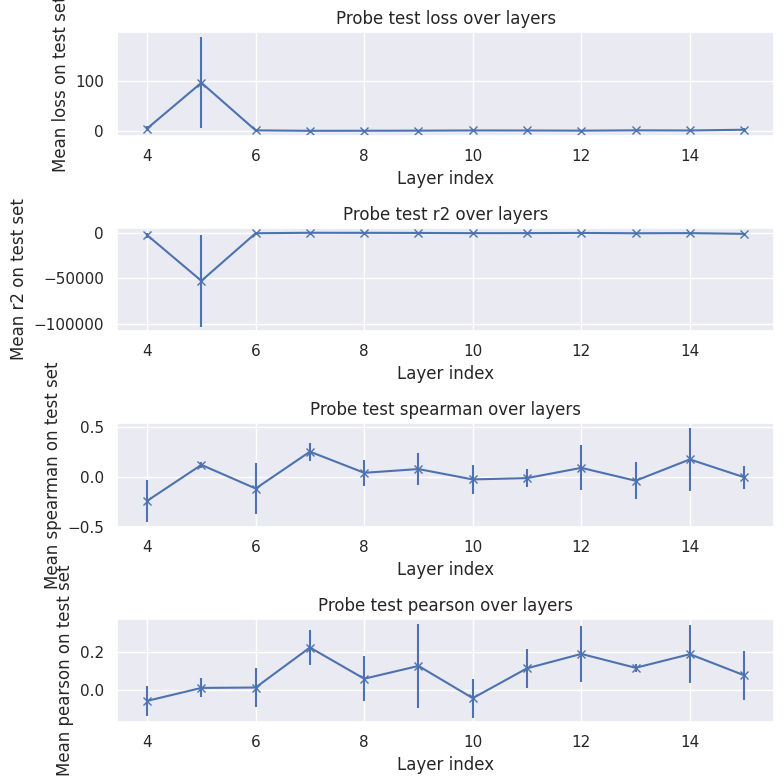

In [ ]:
plot_from_summary(more_r2_summary, incl_extras=True)